In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [3]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
xTrain = xTrain.reshape(60000,784).astype('float32')/255
xTest = xTest.reshape(10000,784).astype('float32')/255

In [5]:
yTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# onehot encoding
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [7]:
# 2. 모델 구성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
# 4. 모델 학습
hist = model.fit(xTrain, yTrain, batch_size = 256, epochs=50)
# fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


Epoch 1/50
60000/60000 [==============================] - 1s 13us/step - loss: 2.1334 - accuracy: 0.3518
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 1.1715 - accuracy: 0.7007
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.6154 - accuracy: 0.8269
Epoch 4/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.4632 - accuracy: 0.8677
Epoch 5/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.3953 - accuracy: 0.8867
Epoch 6/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.3557 - accuracy: 0.8973
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.3299 - accuracy: 0.9044
Epoch 8/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.3105 - accuracy: 0.9100
Epoch 9/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2937 - accuracy: 0.9149
Epoch 10/50
60000/60000 [=============================

In [10]:
# 5. 훈련셋, 검증셋으로 cost 및 accuracy 확인
print(hist.history['loss'])
print(hist.history['accuracy'])
# print(hist.history['val_loss'])

[2.133412535349528, 1.1714524945576985, 0.6154436062812805, 0.4631927263577779, 0.39531309564908346, 0.35570588555335997, 0.32985151681900027, 0.3104896543343862, 0.29374826181729635, 0.28040972615877785, 0.2689915804942449, 0.25869717321395874, 0.24903623365561167, 0.2405177401781082, 0.2324725492397944, 0.22486775352954866, 0.21783347160021463, 0.21124099171559016, 0.20554194984436036, 0.19925913381576538, 0.19438335209687552, 0.18881597776412964, 0.18382959855794906, 0.1793826657215754, 0.17479230817953745, 0.1708431167602539, 0.16696383979320525, 0.16250083036820093, 0.15903449013233184, 0.1556415046453476, 0.15263231865167617, 0.1492069154024124, 0.14609063317378362, 0.1433721097946167, 0.14051986303726832, 0.13777198803424834, 0.1352754396001498, 0.13272143882910412, 0.13050931395689647, 0.12798564033309617, 0.12594652353525163, 0.12362323781649272, 0.1213837166706721, 0.11925839281876882, 0.11711748578548431, 0.11524906374613444, 0.11317818105220795, 0.11118897595405579, 0.10967

In [11]:
import pandas as pd
pd.Series(hist.history['loss']).plot()
# pd.Series(hist.history['val_loss']).plot()

In [12]:
# 6. 모델 평가
model.evaluate(xTest, yTest, batch_size=32)

10000/10000 [==============================] - 0s 24us/step


[0.1251392334289849, 0.9634000062942505]

In [13]:
xhat = xTest[0:1]
yhat = model.predict(xhat)
print(yhat)

[[1.7572336e-05 5.3182330e-06 1.2206667e-03 8.3751581e-04 3.7277325e-06
  2.0544642e-06 5.1504312e-10 9.9773443e-01 3.8454458e-05 1.4017499e-04]]


Train Test 나누기

In [14]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [15]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
xTrain = xTrain.reshape(60000,784).astype('float32')/255
xTest = xTest.reshape(10000,784).astype('float32')/255

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xTrain, yTrain, test_size=1/6)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 784) (10000, 784) (50000,) (10000,)


In [19]:
import numpy as np
tri = np.random.choice(50000,700)
vri = np.random.choice(10000,300)

In [20]:
xTrain_tri = X_train[tri]
yTrain_tri = y_train[tri]
xVal = X_test[vri]
yVal = y_test[vri]

In [21]:
yTrain_tri = np_utils.to_categorical(yTrain_tri)
yVal = np_utils.to_categorical(yVal)
yTest = np_utils.to_categorical(yTest)

In [22]:
model=Sequential()
model.add(Dense(input_dim=28*28, units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [23]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=50)
# EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
hist = model.fit(xTrain_tri, yTrain_tri, epochs=3000, batch_size=128,validation_data=(xVal, yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 211us/step - loss: 2.3026 - accuracy: 0.0829 - val_loss: 2.3016 - val_accuracy: 0.1067
Epoch 2/3000
700/700 [==============================] - 0s 45us/step - loss: 2.2996 - accuracy: 0.0886 - val_loss: 2.2993 - val_accuracy: 0.1100
Epoch 3/3000
700/700 [==============================] - 0s 41us/step - loss: 2.2967 - accuracy: 0.0929 - val_loss: 2.2968 - val_accuracy: 0.1133
Epoch 4/3000
700/700 [==============================] - 0s 40us/step - loss: 2.2938 - accuracy: 0.0971 - val_loss: 2.2945 - val_accuracy: 0.1067
Epoch 5/3000
700/700 [==============================] - 0s 37us/step - loss: 2.2911 - accuracy: 0.1000 - val_loss: 2.2922 - val_accuracy: 0.1033
Epoch 6/3000
700/700 [==============================] - 0s 38us/step - loss: 2.2883 - accuracy: 0.1029 - val_loss: 2.2899 - val_accuracy: 0.1133
Epoch 7/3000
700/700 [==============================] - 0s 40us/step - loss: 2.2856

Epoch 57/3000
700/700 [==============================] - 0s 48us/step - loss: 1.5653 - accuracy: 0.6100 - val_loss: 1.6279 - val_accuracy: 0.5633
Epoch 58/3000
700/700 [==============================] - 0s 50us/step - loss: 1.5234 - accuracy: 0.6343 - val_loss: 1.5942 - val_accuracy: 0.5700
Epoch 59/3000
700/700 [==============================] - 0s 47us/step - loss: 1.4805 - accuracy: 0.6343 - val_loss: 1.5560 - val_accuracy: 0.5967
Epoch 60/3000
700/700 [==============================] - 0s 47us/step - loss: 1.4355 - accuracy: 0.6486 - val_loss: 1.5078 - val_accuracy: 0.5967
Epoch 61/3000
700/700 [==============================] - 0s 47us/step - loss: 1.3890 - accuracy: 0.6800 - val_loss: 1.4641 - val_accuracy: 0.6133
Epoch 62/3000
700/700 [==============================] - 0s 47us/step - loss: 1.3439 - accuracy: 0.7014 - val_loss: 1.4320 - val_accuracy: 0.6133
Epoch 63/3000
700/700 [==============================] - 0s 53us/step - loss: 1.2988 - accuracy: 0.7071 - val_loss: 1.3857 -

700/700 [==============================] - 0s 38us/step - loss: 0.3247 - accuracy: 0.9243 - val_loss: 0.6293 - val_accuracy: 0.7800
Epoch 114/3000
700/700 [==============================] - 0s 40us/step - loss: 0.3241 - accuracy: 0.9200 - val_loss: 0.6549 - val_accuracy: 0.7800
Epoch 115/3000
700/700 [==============================] - 0s 38us/step - loss: 0.3242 - accuracy: 0.9157 - val_loss: 0.5941 - val_accuracy: 0.8000
Epoch 116/3000
700/700 [==============================] - 0s 40us/step - loss: 0.3205 - accuracy: 0.9143 - val_loss: 0.6380 - val_accuracy: 0.7867
Epoch 117/3000
700/700 [==============================] - 0s 40us/step - loss: 0.3054 - accuracy: 0.9186 - val_loss: 0.6163 - val_accuracy: 0.7967
Epoch 118/3000
700/700 [==============================] - 0s 38us/step - loss: 0.2926 - accuracy: 0.9257 - val_loss: 0.6213 - val_accuracy: 0.7900
Epoch 119/3000
700/700 [==============================] - 0s 38us/step - loss: 0.2839 - accuracy: 0.9314 - val_loss: 0.6170 - val_acc

Epoch 169/3000
700/700 [==============================] - 0s 38us/step - loss: 0.1009 - accuracy: 0.9886 - val_loss: 0.5791 - val_accuracy: 0.8200
Epoch 170/3000
700/700 [==============================] - 0s 40us/step - loss: 0.1016 - accuracy: 0.9871 - val_loss: 0.5711 - val_accuracy: 0.8367
Epoch 171/3000
700/700 [==============================] - 0s 40us/step - loss: 0.1033 - accuracy: 0.9843 - val_loss: 0.5772 - val_accuracy: 0.8400
Epoch 172/3000
700/700 [==============================] - 0s 38us/step - loss: 0.0942 - accuracy: 0.9886 - val_loss: 0.5595 - val_accuracy: 0.8267
Epoch 173/3000
700/700 [==============================] - 0s 40us/step - loss: 0.0995 - accuracy: 0.9843 - val_loss: 0.5887 - val_accuracy: 0.8067
Epoch 174/3000
700/700 [==============================] - 0s 40us/step - loss: 0.0935 - accuracy: 0.9886 - val_loss: 0.5877 - val_accuracy: 0.8033
Epoch 175/3000
700/700 [==============================] - 0s 38us/step - loss: 0.0954 - accuracy: 0.9857 - val_loss: 0

In [26]:
import matplotlib.pyplot as plt

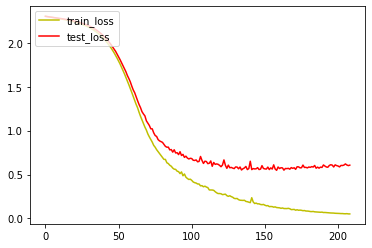

In [27]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test_loss')
loss_ax.legend(loc='upper left')
plt.show()

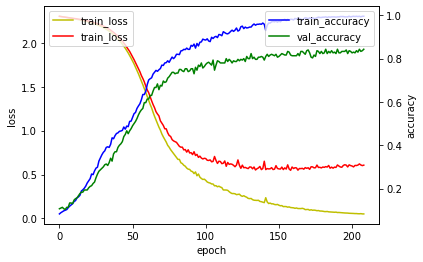

In [28]:
figs, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # 동일안 axis를 만들 수 있음
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='train_loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val_accuracy')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [29]:
res = model.evaluate(xTest, yTest, batch_size=64)
print('cost : ', res[0])
print('accuracy : ', res[1])

10000/10000 [==============================] - 0s 22us/step
cost :  0.511842113995552
accuracy :  0.8621000051498413


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10997675588862133716]

폐암 데이터 활용 실용

In [30]:
import tensorflow as tf
import numpy as np

In [31]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

In [32]:
data = np.loadtxt(r'C:\Users\chan\Desktop\dataset\ThoraricSurgery.csv', delimiter=',')

In [33]:
data

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [34]:
x = data[:,:17]
y = data[:,17]

In [35]:
model = Sequential()
model.add(Dense(32, input_shape=(17,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 노드 1 : 0또는 1을 나타내는 값이 1개 있다는 의미

In [36]:
model.compile(loss='mean_squared_error',
             optimizer='adam', metrics=['accuracy'] )

In [37]:
model.fit(x,y,epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 5s 10ms/step - loss: 0.1495 - accuracy: 0.8426
Epoch 2/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 3/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 4/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511: 0s - loss: 0.1
Epoch 7/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 10/30
470/470 [==============================] - 4s 9ms/step - loss: 0.1489 -

KeyboardInterrupt: 

In [38]:
model.evaluate(x,y)

470/470 [==============================] - 0s 511us/step


[0.14893617008594756, 0.8510638475418091]

In [39]:
model.predict_classes(x)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [40]:
xy = np.loadtxt(r"C:\Users\chan\Desktop\dataset" + '\data-03-diabetes.csv',delimiter=',')
xdata = xy[:,0:-1]
ydata = xy[:,[-1]] # -1을 []로 묶어주어야 열로 잡힘

In [41]:
print(xdata.shape, ydata.shape)

(759, 8) (759, 1)


### multinomial classification

각 class 에 대해서 분류하는 분류기준이 필요함

softmax_cross_entropy with logistic regressions
A : 분류를 위한 w1*x1+b1
B : 분류를 위한 w2*x2+b2
C : 분류를 위한 w3*x3+b3
이런 식으로 3개가 필요함


In [42]:
xdata.shape

(759, 8)

In [43]:
w = tf.Variable(tf.random_normal([8,1]))
b = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32, shape=[None, 8])
y = tf.placeholder(tf.float32, shape=[None, 1])

In [44]:
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [45]:
train = tf.train.GradientDescentOptimizer(1e-2).minimize(cost)

In [46]:
predicted = tf.cast(hf>0.5, dtype=tf.float32)

In [47]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [48]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [49]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv, _ = sess.run([cost, train], feed_dict={x:xdata, y:ydata})
        if step%200 == 0:
            print(step, cv)
    hv,pv,av = sess.run([hf, predicted, accuracy],
                       feed_dict={x:xdata, y:ydata})
    print(hv, pv, av)

0 0.9983103
200 0.6718712
400 0.61970806
600 0.6030887
800 0.59231687
1000 0.5832214
1200 0.5750748
1400 0.56768787
1600 0.5609659
1800 0.5548375
2000 0.5492408
2200 0.54412156
2400 0.5394312
2600 0.5351269
2800 0.5311705
3000 0.5275282
3200 0.5241701
3400 0.52106905
3600 0.5182014
3800 0.51554585
4000 0.5130831
4200 0.51079625
4400 0.50867
4600 0.5066907
4800 0.5048457
5000 0.5031241
5200 0.5015158
5400 0.5000117
5600 0.4986037
5800 0.49728402
6000 0.49604616
6200 0.49488384
6400 0.49379158
6600 0.49276397
6800 0.49179664
7000 0.49088517
7200 0.49002567
7400 0.48921448
7600 0.48844847
7800 0.48772448
8000 0.4870397
8200 0.48639154
8400 0.48577765
8600 0.48519596
8800 0.48464426
9000 0.48412082
9200 0.48362383
9400 0.48315173
9600 0.48270288
9800 0.48227605
10000 0.48186988
[[0.38009375]
 [0.920615  ]
 [0.23300505]
 [0.9405484 ]
 [0.09696198]
 [0.7712471 ]
 [0.938222  ]
 [0.60090965]
 [0.2559119 ]
 [0.52923137]
 [0.7127117 ]
 [0.17529142]
 [0.19261381]
 [0.25309896]
 [0.7141089 ]
 [0.4

In [54]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5670383668128662833]